# MY SPOTIFY STREAMING HISTORY - DATA EXPLORATION

***

<br>

<br>

As a avivd music fan and listener, I wanted to explore and incorporate this into a project. The aim of this project is to research and investigate my personal Spotify listening history, doing so by writing documentation and investigate the data using Python.

<br>

<br>

My learning goals for this project are:

<li>Exercise my data anaylsis skills by explore my Spotify streaming history using Python</li>
<li>Visualise the data using matplotlib and seaborn.</li>
<li>Gain a detailed knowledge of my listening habits</li>
<li>How my findings will affect my listening habits </li>

<br>

<br>





<img src="https://www.pngitem.com/pimgs/m/148-1487614_spotify-logo-small-spotify-logo-transparent-hd-png.png" alt="alt_text" align="left"
	width="150" height="150" />


<br>
Spotify is the world's largest music streaming service provider, with over 365 million monthly active users, including 165 million paying subscribers, as of June 2021 (Spotify, 2021). 

I requested my streaming history from the [following link](https://www.spotify.com/ie/account/privacy/). After a few days Spotify sent me an email with a download link. After downloading the data, which was in nine seprate json files, I converted them to a  csv file using Google Sheets. This is the dataset I used and can be found in the project respority on Github [here](https://github.com/kmcd14/spotify-history-data-analysis).

<br>

The column headings are as follows: 

<li>endTime</li>
<li>artistName</li>	
<li>trackName</li>	
<li>msPlayed</li>

<br></br>
This data inculdes my streaming history from 29-07-2020 untill 30-7-2021.
 

<br>

<br>

***

<br>

<br>

<br>

### Importing Libaries

<br>

<br>

In [1]:
import pandas as pd # Impoting Pandas
import numpy as np # Importing Numpy
import matplotlib.pyplot as plt # Importing Matplotlib
import seaborn as sns # Importing Seaborn
from wordcloud import WordCloud # Importing WordCloud
from pywaffle import Waffle # Importing pywaffle

<br>

<br>

<br>

### Loading the dataset 

<br>

In [2]:
# Reading the Steaming_History CSV file into a pandas DataFrame
df = pd.read_csv('streaming_history.csv') 

<br>

<br>

<br>

### Data

<br>

In [3]:
# An overview of the dataframe
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95687 entries, 0 to 95686
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     95687 non-null  object
 1   artistName  95687 non-null  object
 2   trackName   95687 non-null  object
 3   msPlayed    95687 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


<br>

<br>

<br>

Getting an overview of the data using .info() to make sure it loaded correctly. This will return how many rows there are, column names, whether there are null vaules and the datatype. 

Using the head and tail methods we can get a futher look at the dataset. We know from using the info method, there should be 95687 rows and 4 columns.

<br>

<br>

<br>

In [4]:
 # Returns the first 5 rows by default
df.head()

,endTime,artistName,trackName,msPlayed
0,2020-07-29 14:30,Madonna,Celebration,195590
1,2020-07-29 23:02,Carly Rae Jepsen,Beautiful,28663
2,2020-07-30 9:21,Carly Rae Jepsen,Sweetie,36382
3,2020-07-30 9:21,Carly Rae Jepsen,Stay Away,217306
4,2020-07-30 9:22,Carly Rae Jepsen,Right Words Wrong Time,557


<br>

<br>

<br>

In [5]:
# Returns the last 5 rows by default.
df.tail() 

,endTime,artistName,trackName,msPlayed
95682,2021-07-30 18:16,Carly Rae Jepsen,Let's Be Friends,190242
95683,2021-07-30 18:19,Mae Muller,Therapist,183726
95684,2021-07-30 18:23,Lindsay Lohan,Bossy - Main Version Clean,250293
95685,2021-07-30 18:27,Tei Shi,Die 4 Ur Love,199773
95686,2021-07-30 18:31,Taylor Swift,Dress,230373


<br>

<br>

<br>

In [6]:
 # Unique elements in each column 
df.nunique()

endTime       36463
artistName     2899
trackName      9154
msPlayed      23265
dtype: int64

<br>

<br>

<br>

<br>

### Formatting and Overview

<br>

In [7]:
# To create a new column 'Playtime'
df["PlayTime"] = pd.to_datetime(df["endTime"]) 

<br>

<br>

 Here we used the DatetimeIndex module to obatin the several unique information. We also added them to a new columns as per their representaion and information.


<br>

In [8]:
# The year the song was played
df['year'] = pd.DatetimeIndex(df['PlayTime']).year 

 # The month the song was played
df['month'] = pd.DatetimeIndex(df['PlayTime']).month

# The date of the day the song was played
df['day'] = pd.DatetimeIndex(df['PlayTime']).day 

 # The weekday the song was played(numerical)
df['weekday'] = pd.DatetimeIndex(df['PlayTime']).weekday

# The time the song was played
df['time'] = pd.DatetimeIndex(df['PlayTime']).time 

# The hour the song was played
df['hours'] = pd.DatetimeIndex(df['PlayTime']).hour 

# The weekday in name form the song was played
df['day-name'] = df['PlayTime'].apply(lambda x: x.day_name()) 

# The number of times the song was played
df['Count'] = 1 

<br>

<br>

We can take a look at the dataframe with the newly added columns

<br>

<br>

In [9]:
# First 5 rows
df.head() 

,endTime,artistName,trackName,msPlayed,PlayTime,year,month,day,weekday,time,hours,day-name,Count
0,2020-07-29 14:30,Madonna,Celebration,195590,2020-07-29 14:30:00,2020,7,29,2,14:30:00,14,Wednesday,1
1,2020-07-29 23:02,Carly Rae Jepsen,Beautiful,28663,2020-07-29 23:02:00,2020,7,29,2,23:02:00,23,Wednesday,1
2,2020-07-30 9:21,Carly Rae Jepsen,Sweetie,36382,2020-07-30 09:21:00,2020,7,30,3,09:21:00,9,Thursday,1
3,2020-07-30 9:21,Carly Rae Jepsen,Stay Away,217306,2020-07-30 09:21:00,2020,7,30,3,09:21:00,9,Thursday,1
4,2020-07-30 9:22,Carly Rae Jepsen,Right Words Wrong Time,557,2020-07-30 09:22:00,2020,7,30,3,09:22:00,9,Thursday,1


<br>

<br>

<br>

msPlayed is the time played in miliseconds. Converting this into hours and minutes will help me better understand the data better. This can be done through using the timedelta function in the timedate module.

<br>

<br>

In [10]:
# Using msPlayed to create another column called TimePlayed in hh-mm-ss format. 
df["TimePlayed (hh-mm-ss)"] = pd.to_timedelta(df["msPlayed"], unit='ms')

<br>

<br>

To futher drill-down on this column, we can use a function to create seprate columns for hours and minutes.

<br>

<br>

In [11]:
# Getting the listening time in hours
def hours(listening_time): 
    return listening_time.seconds/3600 # There are 3600seconds in an hour.

# Getting the listening time in minutes
def minutes(listening_time):
    return (listening_time.seconds/60)%60 # There are 60minutes in an hour.

# Creating new columns for listening time in hours and minutes. Rounding to 3 places after the decimal 
df["Listening Time(Hours)"] = df["TimePlayed (hh-mm-ss)"].apply(hours).round(3) 
df["Listening Time(Minutes)"] = df["TimePlayed (hh-mm-ss)"].apply(minutes).round(3)

<br>

<br>

In [12]:
# First 5 rows 
df.head() 

,endTime,artistName,trackName,msPlayed,PlayTime,year,month,day,weekday,time,hours,day-name,Count,TimePlayed (hh-mm-ss),Listening Time(Hours),Listening Time(Minutes)
0,2020-07-29 14:30,Madonna,Celebration,195590,2020-07-29 14:30:00,2020,7,29,2,14:30:00,14,Wednesday,1,0 days 00:03:15.590000,0.054,3.250
1,2020-07-29 23:02,Carly Rae Jepsen,Beautiful,28663,2020-07-29 23:02:00,2020,7,29,2,23:02:00,23,Wednesday,1,0 days 00:00:28.663000,0.008,0.467
2,2020-07-30 9:21,Carly Rae Jepsen,Sweetie,36382,2020-07-30 09:21:00,2020,7,30,3,09:21:00,9,Thursday,1,0 days 00:00:36.382000,0.010,0.600
3,2020-07-30 9:21,Carly Rae Jepsen,Stay Away,217306,2020-07-30 09:21:00,2020,7,30,3,09:21:00,9,Thursday,1,0 days 00:03:37.306000,0.060,3.617
4,2020-07-30 9:22,Carly Rae Jepsen,Right Words Wrong Time,557,2020-07-30 09:22:00,2020,7,30,3,09:22:00,9,Thursday,1,0 days 00:00:00.557000,0.000,0.000


<br>

<br>

There are some extra columns in this dataframe we won't be using. We can get rid of them by using the .drop() method. 

<br>

<br>

In [13]:
# Dropping columns. Assigning True to inPlace means the data is modified in place.
df.drop(columns=["endTime","TimePlayed (hh-mm-ss)","msPlayed"], inplace=True) 

In [14]:
df

,artistName,trackName,PlayTime,year,month,day,weekday,time,hours,day-name,Count,Listening Time(Hours),Listening Time(Minutes)
0,Madonna,Celebration,2020-07-29 14:30:00,2020,7,29,2,14:30:00,14,Wednesday,1,0.054,3.250
1,Carly Rae Jepsen,Beautiful,2020-07-29 23:02:00,2020,7,29,2,23:02:00,23,Wednesday,1,0.008,0.467
2,Carly Rae Jepsen,Sweetie,2020-07-30 09:21:00,2020,7,30,3,09:21:00,9,Thursday,1,0.010,0.600
3,Carly Rae Jepsen,Stay Away,2020-07-30 09:21:00,2020,7,30,3,09:21:00,9,Thursday,1,0.060,3.617
4,Carly Rae Jepsen,Right Words Wrong Time,2020-07-30 09:22:00,2020,7,30,3,09:22:00,9,Thursday,1,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95682,Carly Rae Jepsen,Let's Be Friends,2021-07-30 18:16:00,2021,7,30,4,18:16:00,18,Friday,1,0.053,3.167
95683,Mae Muller,Therapist,2021-07-30 18:19:00,2021,7,30,4,18:19:00,18,Friday,1,0.051,3.050
95684,Lindsay Lohan,Bossy - Main Version Clean,2021-07-30 18:23:00,2021,7,30,4,18:23:00,18,Friday,1,0.069,4.167
95685,Tei Shi,Die 4 Ur Love,2021-07-30 18:27:00,2021,7,30,4,18:27:00,18,Friday,1,0.055,3.317


<br>

<br>

<br>

Another way to get an overview and quick view of status is by using the descibe method. this allows us to see such things as min and max values, standard deviation, mean, etc.

<br>

<br>

In [15]:
df.describe()

,year,month,day,weekday,hours,Count,Listening Time(Hours),Listening Time(Minutes)
count,95687.000000,95687.000000,95687.000000,95687.000000,95687.000000,95687.0,95687.000000,95687.000000
mean,2020.688474,5.494539,15.980144,3.038898,14.511114,1.0,0.018991,1.137574
std,0.463120,3.356882,9.078682,2.010645,4.807954,0.0,0.029928,1.722305
min,2020.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,2020.000000,3.000000,8.000000,1.000000,11.000000,1.0,0.000000,0.000000
50%,2021.000000,5.000000,16.000000,3.000000,14.000000,1.0,0.000000,0.017000
75%,2021.000000,8.000000,24.000000,5.000000,18.000000,1.0,0.046000,2.783000
max,2021.000000,12.000000,31.000000,6.000000,23.000000,1.0,1.346000,45.400000


<br>

<br>

<br>

# Exploratory Analysis + Visualisation
***

<br>

<br>

### Artist Analysis

<br>

Let's have a deeper look at my listening habits. First let's look at the number of artists and what percentage of them are unique.

<br>

In [16]:
# The number of artist's in my streaming history
num_artists = df['artistName'].count()
num_artists

95687

<br>

<br>

In [17]:
# The number of these artists which are unique i.e.(there name appears at least once)
unique_artists = df['artistName'].nunique()
unique_artists

2899

<br>

<br>

In [18]:
# Getting the % difference
unique_percentage = unique_artists/num_artists*100
unique_percentage.round(3)

3.03

<br>

<br>

Let's visualise these findings 

<br>

<br>

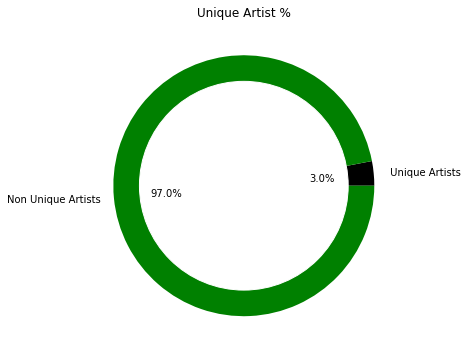

In [19]:
# Make an array out of the results
unique_artist_list = np.array([unique_artists, num_artists-unique_artists]) 

# Make a label for them
unique_artist_list_labels = [" Unique Artists", "Non Unique Artists"] 

# Creating a figure
fig, ax = plt.subplots(figsize=(12,6)) 
# Data, lables, colours, %
plt.pie(unique_artist_list, labels= unique_artist_list_labels, colors='kg', autopct='%1.1f%%') 

# Adding a title
plt.title("Unique Artist %")

# Adding a circle at the center to make it a donut chart
my_circle=plt.Circle( (0,0), 0.8, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

<br>

<br>

<br>

From this we can see that the majority of my listening time is made up of listening to the same artists. I do so just over 97% of the time. 

Let's take a closer look at the artists are. We can do this by creating a new dataframe of consisting of the relevant columns, in this case - Artist Name, Listening Time in Hours, Listening Time in Minutes and Count i.e. the amount of times a song by the artist has been played.

<br>

<br>

<br>

In [20]:
# Getting sum of the relevant columns from the orignal dataframe and ordering them by the amount of times they have been played, most played first 
top_artists = df.groupby(['artistName'])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)

# Seeing my top 20 artists
top_artists.head(20) 

,Listening Time(Hours),Listening Time(Minutes),Count
artistName,,,
Carly Rae Jepsen,233.724,14025.877,9444
Madonna,71.629,4305.259,4109
Lady Gaga,59.593,3573.162,3131
Charli XCX,42.877,2578.627,2170
Róisín Murphy,56.278,3378.968,2062
Little Mix,40.069,2409.411,2029
Tove Lo,42.692,2569.079,1978
Katy Perry,30.918,1860.124,1877
St. Vincent,44.221,2652.991,1748


<br>

<br>

<br>

Text(0.5, 1.0, 'Top Artists (Times Played)')

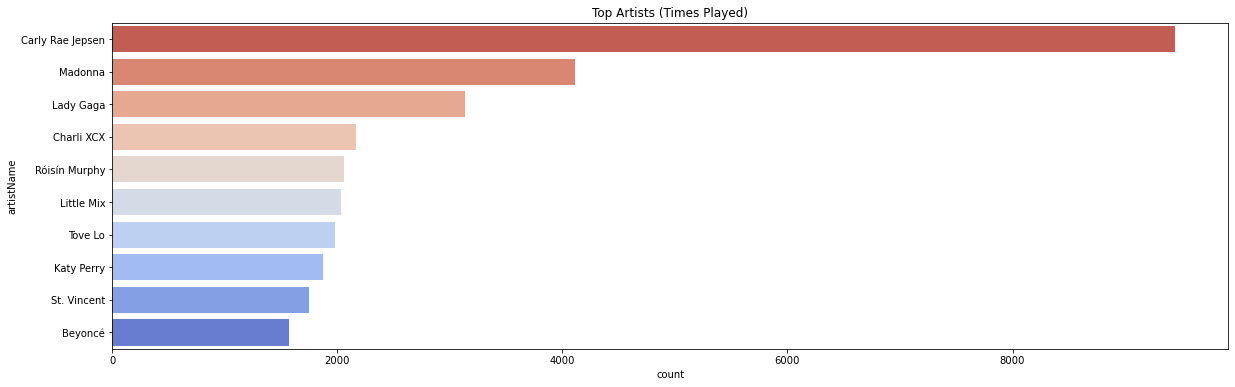

In [21]:
# Visualising the top_artists dataframe and using iloc[:10] to limit it to the top 10 artists

plt.figure(figsize=(20,6))
sns.countplot(y=df['artistName'], data=top_artists, order=df['artistName'].value_counts().iloc[:10].index, palette='coolwarm_r')
plt.ylabel = ('Times Played')
plt.title('Top Artists (Times Played)')

<br>

<br>

<br>

From the data above we can see that the number of times playing a song from an artists is different from the amount of time spent listening to an artist. This is intresting to information to see.

For example: I have listened to Charli XCX who is in 4th place for 2578.627 minutes which translates as playing her 2170 times. Whereas, 5th place Róisín Murphy I have listened to for a greater period of time - 3378.968 minutes but, have only played her 2062 times. To me the difference comes down to song lenght. As Charli XCX performs more short hyper-pop/pop tracks. Whereas Róisín Murphy's music is electronic/dance-pop which is for the most part longer in duration.

Below I will use the same dataframe as above but, this time order it by the lenght of time listened in minutes. I chose minutes as that is the time measurement Spotify uses in its end of year Spotify Unwrapped.

<br>

<br>

<br>

In [22]:
# Getting sum of the relevant columns from the orignal dataframe and ordering them by the listening time in minutes 
top_artists_mins = df.groupby(['artistName'])[['artistName','Listening Time(Hours)','Listening Time(Minutes)','Count']].sum().sort_values(by='Listening Time(Minutes)',ascending=False)
top_artists_mins.head(20) # Seeing my top 20 artists

,Listening Time(Hours),Listening Time(Minutes),Count
artistName,,,
Carly Rae Jepsen,233.724,14025.877,9444
Madonna,71.629,4305.259,4109
Lady Gaga,59.593,3573.162,3131
Róisín Murphy,56.278,3378.968,2062
St. Vincent,44.221,2652.991,1748
Charli XCX,42.877,2578.627,2170
Tove Lo,42.692,2569.079,1978
Little Mix,40.069,2409.411,2029
Christine and the Queens,34.950,2100.887,1375


<br>

<br>

<br>

It's really intresting to see the change in ranking. Charli XCX has gone from 4th to 6th place. St. Vincent who was 9th in the count ranking has moved up to 5th place. Lorde who didn't make the top 20 in the previous dataframe is now in the top 20 based on the amount of minutes spent listening. 

Using the WordCloud libary I can make a wordcloud out of my favourite artists, I will do so based on the number of times played(count)

<br>

<br>

In [23]:
# Creating a new dataframe for the wordcloud
fav_artist = df.groupby(["artistName"])["Count"].count()

<br>

(-0.5, 499.5, 249.5, -0.5)

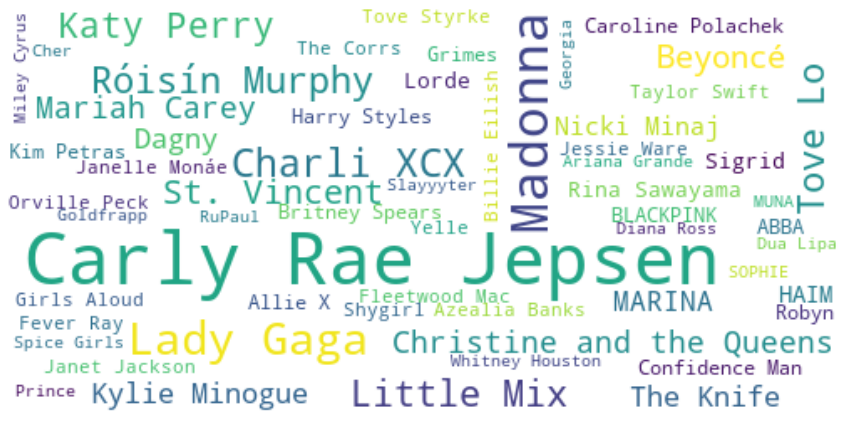

In [24]:
# Creating a wordcloud
fig, ax = plt.subplots(figsize=(15,20))

wordcloud = WordCloud(width = 500, height = 250, background_color ='white', min_font_size = 10).generate_from_frequencies(fav_artist)

ax.imshow(wordcloud, interpolation='bilinear')
plt.axis(False) # Hiding the axis

<br>

<br>

<br>

<br>

### Track Analysis

<br>

<br>

In [25]:
# The number of songs in my streaming history
num_tracks = df['trackName'].count()
num_tracks

95687

<br>

<br>

In [26]:
# The number of songs which are unique i.e.(ppears at least once)
unique_tracks = df['trackName'].nunique()
unique_tracks

9154

<br>

<br>

In [27]:
# Getting the % difference
unique_percentage = unique_tracks/num_tracks*100
unique_percentage.round(2)

9.57

<br>

<br>

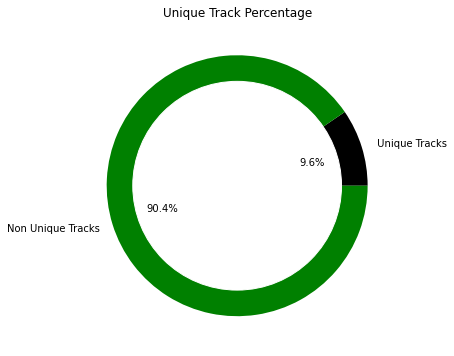

In [28]:
unique_tracks_list = np.array([unique_tracks, num_tracks-unique_tracks])  # Make an array out of the results
unique_tracks_list_labels = [" Unique Tracks", "Non Unique Tracks"] # Adding labels

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(unique_tracks_list, labels= unique_tracks_list_labels, colors='kg', autopct='%1.1f%%') # Data, labels, colour, %
plt.title("Unique Track Percentage")

# Adding a circle at the center to make it a donut chart
my_circle=plt.Circle( (0,0), 0.8, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

<br>

<br>

<br>

Again, we can see that the majority of my listening time is consists of listening to the same tracks. Although, it's 7.6% less when compared to listening to the same artists. The observations I make from this is that I listen to an artist's profile and listen to their back catalogue/deep cuts. I also regularly listen to the Discover Weekly playlist which the Spotify algorithm creates based off your listening habits the previous week. Additionally, If listening to a playlist or song, Spotify will play a radio based on what you where listening to when it ends. I think this has made the % marginally larger.

Let's take a closer look at the artists are. We can do this by creating a new dataframe of consisting of the relevant columns, in this case - Track Name, Listening Time in Hours, Listening Time in Minutes and Count i.e. the amount of times a song has been played.

<br>

<br>

In [29]:
# Getting sum of the relevant columns from the orignal dataframe and ordering them by the number of times played 
top_tracks = df.groupby(["trackName"])[['Listening Time(Hours)','Listening Time(Minutes)','Count']].sum().sort_values(by='Count',ascending=False)
top_tracks.head(20) # Top 20 songs by count

,Listening Time(Hours),Listening Time(Minutes),Count
trackName,,,
Comeback,10.072,604.821,287
Let’s Get Lost,6.982,416.522,257
Emotion,6.317,377.455,246
I Really Like You,5.701,340.708,235
Making The Most Of The Night,7.546,453.655,229
Fever,6.215,373.664,222
Your Type,5.689,343.036,221
Call Me Maybe,6.193,369.386,217
Run Away With Me,7.570,453.068,214


<br>

<br>

<br>

<AxesSubplot:title={'center':'Top Songs (Times Played)'}, xlabel='count', ylabel='trackName'>

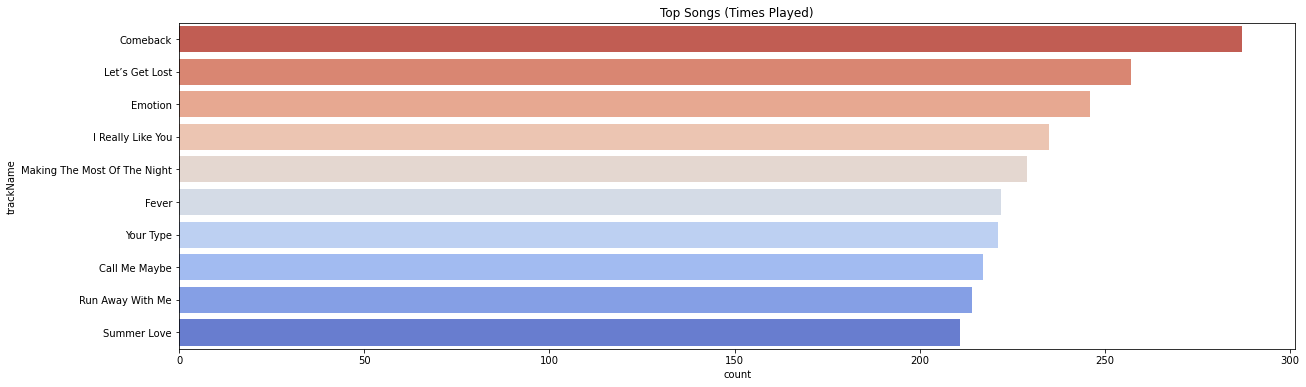

In [30]:
plt.figure(figsize=(20,6))
plt.ylabel = ('Times Played')
plt.title('Top Songs (Times Played)')
sns.countplot(y=df['trackName'], data=top_tracks, order=df['trackName'].value_counts().iloc[:10].index, palette='coolwarm_r')

<br>

<br>

<br>

There is a smalller margin between the count on the number of times I have played a song than the number of times I have played an artist. All 10 songs on the above countplot are by my top artist - Carly Rae Jepsen. This supports the earlier data which found I listened to her 5,335 more times then my second most listened to artist, Madonna. 

Below I will use the same dataframe as above but, this time order it by the lenght of time listened in minutes. I chose minutes again as it is the time measurement Spotify uses in its end of year Spotify Unwrapped.

<br>

<br>

In [31]:
# Getting sum of the relevant columns from the orignal dataframe and ordering them by lenght of time played 
top_tracks_time = df.groupby(["trackName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]
                                           ].sum().sort_values(by='Listening Time(Minutes)',ascending=False)
top_tracks_time.head(20) # Top 20 songs based on lenght of time played in minutes

,Listening Time(Hours),Listening Time(Minutes),Count
trackName,,,
Comeback,10.072,604.821,287
Love Again - Bonus Track,7.820,467.653,209
"People, I've been sad",7.684,462.110,184
Making The Most Of The Night,7.546,453.655,229
Run Away With Me,7.570,453.068,214
Let’s Get Lost,6.982,416.522,257
This Love Isn't Crazy,6.622,396.300,211
Summer Love,6.410,385.767,211
The Steps,6.433,384.418,185


<br>

<br>

<br>

<br>

Let's see how my listening habits are spread throughout the week

<br>

<br>

<br>

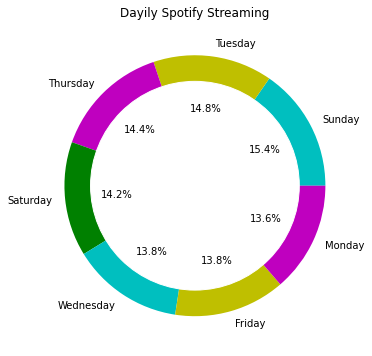

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(df["day-name"].value_counts(), labels=df["day-name"].value_counts().index, autopct='%1.1f%%', colors='cymg')
ax.set(title="Dayily Spotify Streaming")

# Adding a circle at the center to make it a donut chart
my_circle=plt.Circle( (0,0), 0.8, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

<br>

<br>

<br>

<br>

I have a quite even distribution of streaming over the week. This is because on Sundays go for a long walk and would more likely listen to music, whereas Monday to Saturday when I run I listen to podcasts as opposed to music.

Next let's look at my listening habits over the course the the day.

<br>

<br>

<br>

[Text(0.5, 1.0, 'Average Distribution of Streaming Over Day Hours'),
 Text(0.5, 0, 'Hour of The Day (24 hour format)'),
 Text(0, 0.5, 'Songs Played')]

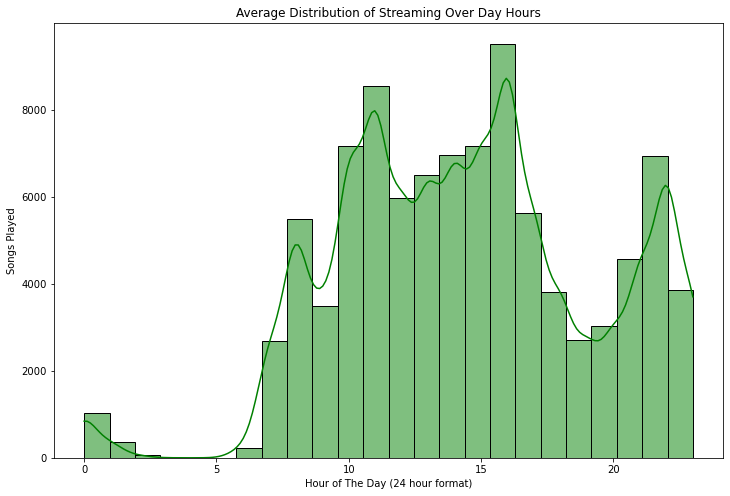

In [33]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(df["hours"], bins=24,kde=True, color="g") # 24 bins  for 24 hours in a day
ax.set(title="Average Distribution of Streaming Over Day Hours",xlabel="Hour of The Day (24 hour format)", ylabel="Songs Played")

<br>

<br>

<br>

<br>

The time I most play music is between 4PM - 5PM.
The time I listen to the least amount of music is between 3AM - 5AM.

I'm not surpised at these findings. I listen to music consistantly throughout the working day as it helps me concentrate and motivates me. Again my usage picks up at 10PM, this would be on average the time I start getting my things together for the following day and getting ready for bed. 



<br>

<br>

[Text(0.5, 1.0, 'Average Spotify Usage'),
 Text(0.5, 0, 'Songs Played (Counts)'),
 Text(0, 0.5, 'Month')]

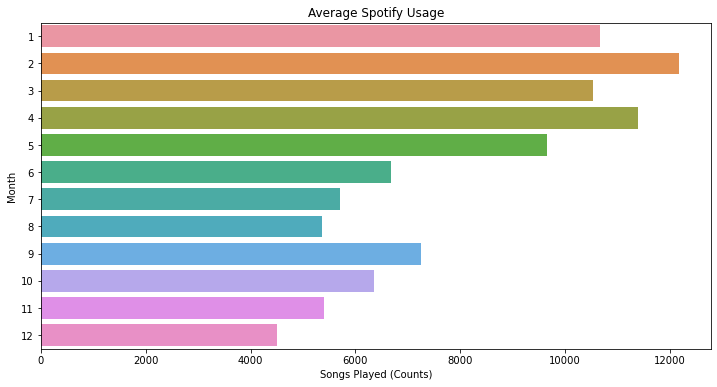

In [34]:
# Getting the average play in count of the year
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(y=df["month"], ax=ax)
ax.set(title="Average Spotify Usage", xlabel="Songs Played (Counts)", ylabel="Month")

<br>

<br>

<br>

February is when I listened to the most music. My usage drops off in the second half of the year, I believe this to be because I started a new job and a lot of that time was taken up with training, meaning I didn't get to listen to as much music during this period as I usually would.

I know that February was the month I played the most music, now let's see which specific day I played the most songs.


<br>

<br>

<br>

In [35]:
df["date"] = df["PlayTime"].dt.date # Creating a new column with date
most_played_day = df.groupby(["date"])[["Count"]].sum().sort_values(by="Count", ascending=False)
most_played_day.head(1)

,Count
date,
2021-02-24,1497


<br>

<br>

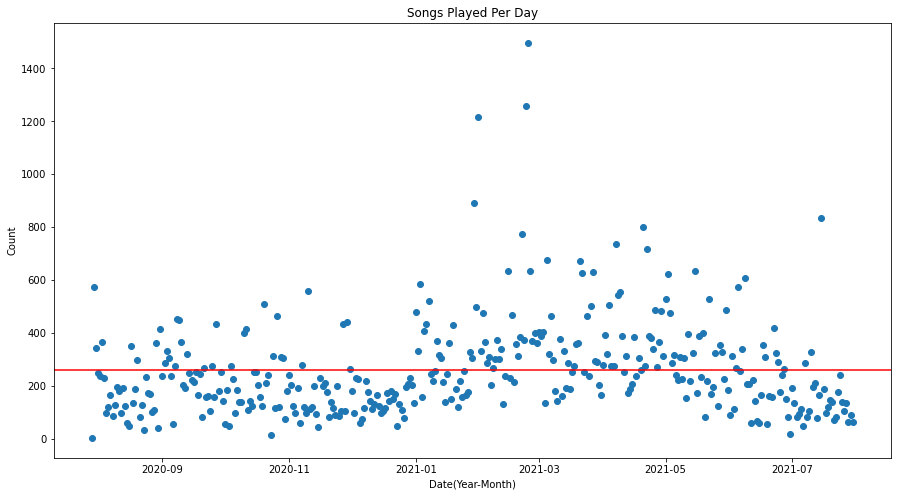

In [36]:
fig,ax = plt.subplots(figsize=(15,8))
ax.scatter(most_played_day.index,most_played_day["Count"])
ax.set(title="Songs Played Per Day",xlabel="Date(Year-Month)",ylabel="Count")
ax.axhline(most_played_day["Count"].mean(), linestyle="-", color="r") # Red line shows the average

<br>

<br>

<br>

On average I listen to just over 250 songs per day. 

Now let's make a pivot table and heat map to show my daily streaming habits

<br>

<br>

In [37]:
# Creating a pivot table of my daily listening~
daily_streaming = df.groupby(['hours', 'day-name'])['artistName'].size().reset_index()
daily_streaming_pivot = daily_streaming.pivot("hours", 'day-name', 'artistName')
daily_streaming_pivot

day-name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hours,,,,,,,
0,223.0,107.0,264.0,329.0,13.0,47.0,42.0
1,282.0,1.0,41.0,33.0,NaN,NaN,2.0
2,47.0,NaN,10.0,NaN,NaN,NaN,1.0
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN
6,75.0,3.0,NaN,NaN,46.0,60.0,47.0
7,520.0,548.0,20.0,NaN,506.0,548.0,539.0
8,618.0,1261.0,211.0,64.0,1041.0,1269.0,1021.0
9,695.0,657.0,181.0,326.0,410.0,618.0,593.0
10,730.0,742.0,1608.0,1248.0,1150.0,617.0,1066.0


<br>

<br>

<br>

[Text(0.5, 1.0, 'Spotify Streaming'),
 Text(0.5, 87.0, 'Day of The Week'),
 Text(114.0, 0.5, 'Time(24 Hours)')]

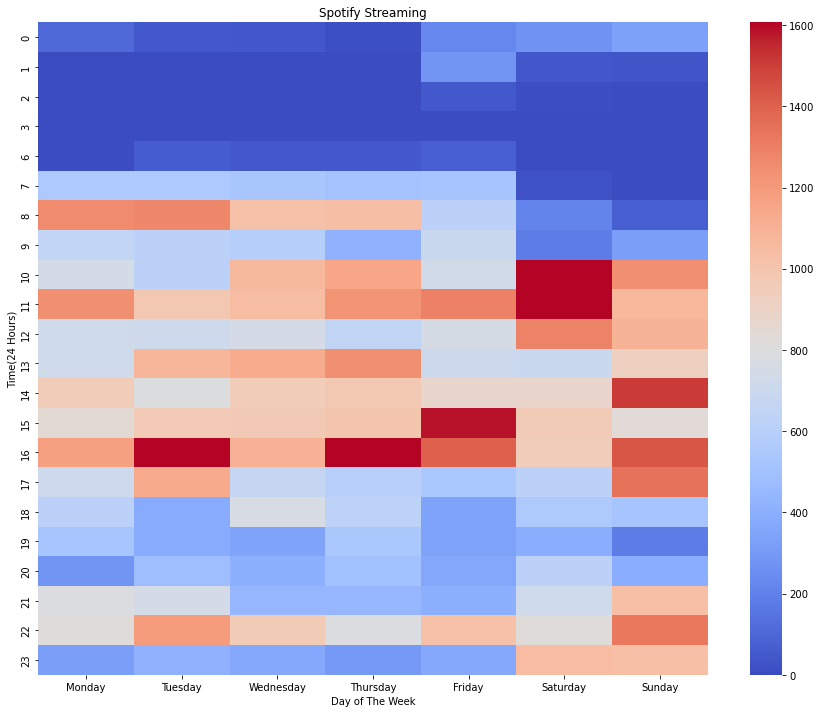

In [38]:
# Creating a heatmap
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, ax = plt.subplots(figsize=(15,12))
ax = sns.heatmap(daily_streaming_pivot[days].fillna(0), robust=True, cmap="coolwarm", ax = ax) # fillna() changes null values to 0
ax.set(title="Spotify Streaming", xlabel="Day of The Week",ylabel="Time(24 Hours)")

<br>

<br>

<br>

We can see that the main time I use Spotify is between the hours of 8AM - 4PM. This makes up the majority of my working day. My listening falls off between 5PM - 10PM, this is when I go for a run where I listen to a podcast, cook and do my college work. This is the reason for the drop in streaming. From 10PM - 11PM my streaming picks up again as this is when I'm getting ready for the following day and washing my face etc.   

My streaming starts later on both Saturday and Sundays, this is because I have a lie in. On Sunday's we can see that streaming is consistent throughout the afternoon, this is down to going for a long walk.

Below, I will take a closer look at weekday vs weekend listening, to futher prove this. 

<br>

<br>

In [39]:
extra_df = df.copy() # Making a copy of the orignal dataframe so as to not alter it.
extra_df['weekday_or_weekend'] = extra_df["day-name"].isin(['Sunday','Saturday']) # If day-name is Saturday or Sunday it's a weekend
weekday_vs_weekend = extra_df.groupby(['weekday_or_weekend'])[['Count']].sum() # Getting the count total
weekday_vs_weekend["Percentage"] = weekday_vs_weekend["Count"]/weekday_vs_weekend["Count"].sum()*100 # Getting the %
weekday_vs_weekend

,Count,Percentage
weekday_or_weekend,,
False,67425,70.464117
True,28262,29.535883


<br>

<br>

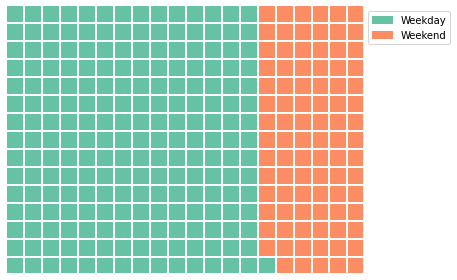

In [40]:
# Waffel Chart to show the difference between streaming on a weekday vs the weekend
fig = plt.figure(FigureClass=Waffle, rows= 15, columns=20, values={'Weekday': 67425, 'Weekend': 28262},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}) # Legend

<br>

<br>

<br>

Now let's find out how many hours I spent listening to Spotify in the last year.

<br>

<br>

In [41]:
time_spent_hours = df["Listening Time(Hours)"].sum() # Summation of all 
time_spent_hours.round(2)

1817.2

<br>

<br>

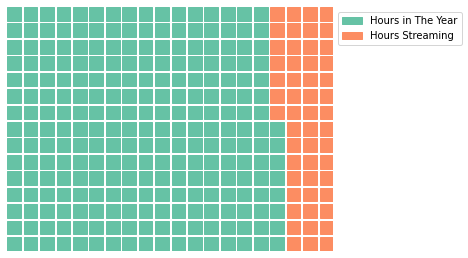

In [42]:
# Waffle Chart
fig = plt.figure(FigureClass=Waffle, rows= 15, columns=20, values={'Hours in The Year': 8760, 'Hours Streaming ': time_spent_hours},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}) # Legend

<br>

<br>

<br>

Considering the average year is consists of 8760 hours, this is quite a sizeable chunk of time. This roughly translates to a huge 76 days worth of music streaming! This surely backs up my claim of being a music lower!! Below we can workout what % of my year was made up streaming Spotify.

<br>

<br>

In [43]:
hour_percentage = time_spent_hours/8760*100 #8760 hours in a year(365)
hour_percentage.round(2)

20.74

<br>

<br>

<br>

***
# Conculsion
***



<n></n>
<li>In the last year I have played a total of 95687 songs.</li>

<li>97% or 2899 of these songs are made up by the same artists.</li>
<li>Of these songs played, 9154 or 9.6% of these songs are unique, i.e. have had at least one play. </li>
<li>My favourite artist i.e. the most streamed is Carly Rae Jepsen. I have played over 233 hours of her music. My played track Carly Rae Jepsen song is 'Comeback', which I have played 287 times. This is also my most played song of the year.</li>
<li>My top 10 most played songs are all by Carly Rae Jepsen, this comes as no surprise as I have listened to her for around 161 hours more than my second placed artist, Madonna (71.62 hours)</li>
<li>I have a fairly equally distribution of playtime throughout the week. Sunday's edge out the other days to be the day I listen to music the most. I attribute this to going for long walks on Sundays.</li>
<li>70.4% of my streaming takes place during the week. This aligns with what I previously thought, as I listen consistently throughout the work day to keep me focused and motivated.</li>
<li>My most active time is between 4PM - 5PM.</li>
<li>On average I play just of 250 songs per day.</li>
<li>February is the month I listened to the most songs. The 2nd of February 2021 is the day I had the most streams. I played 1497 songs.</li>
<li>20.7% of my year or 1817 hours where spent listening to music on Spotify.</li>

I always knew I listened to a lot of music and this project proved that to me. This only accounts for Spotify and not the other streaming services I use such as SoundCloud, YouTube, CD's, etc.
I believe I furfilled the goals of this project; I got insights into my listening habits, exercised my data analysis skills and got to work on something I am passionate about.

<br>

In the future I would like to build on this project and create a automated playlist based off what I listen to and get futher insights in to my music habits such as the type of music I listen to the most.

<br>

<br>

***
# End